# Homework set 3

Please **submit this Jupyter notebook through Canvas** no later than **Mon Nov. 20, 9:00**. **Submit the notebook file with your answers (as .ipynb file) and a pdf printout. The pdf version can be used by the teachers to provide feedback. A pdf version can be made using the save and export option in the Jupyter Lab file menu.**

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

Koen Weverink (14711982) & Jasper Timmer (12854328)

Run the following cell to import NumPy and Pyplot.

In [80]:
import numpy as np
import matplotlib.pyplot as plt

# Exercise 1

In this exercise you will study the accuracy of several methods for computing the QR decomposition. You are asked to implement these methods yourself. (However, when testing your implementation you may compare with an external implementation.)


## (a) 
Implement the classical and modified Gram-Schmidt procedures for computing the QR decomposition.

Include a short documentation using triple quotes: describe at least the input and the output, and whether the code modifies the input matrix.


In [81]:
def classical_gram_schmidt(A):
    """
    Perform the Modified Gram-Schmidt orthogonalization on the columns of a matrix.

    Parameters:
    - A (numpy.ndarray): The matrix whose columns are to be orthogonalized.

    Returns:
    - numpy.ndarray: An orthogonalized matrix Q with the same shape as A, where the columns
      of Q form an orthonormal basis for the column space of A.
    - numpy.ndarray: An upper triangular matrix R such that A = QR.

    Modified Gram-Schmidt is a numerical procedure to orthogonalize the columns of a matrix.
    It improves numerical stability compared to the Classical Gram-Schmidt method by
    orthogonalizing the vectors in a different order. The resulting matrix Q is orthogonal,
    and its columns form a basis that spans the same subspace as the columns of A.
    The upper triangular matrix R records the magnitudes of the projections during the process.
    The original matrix A is left unmodified during the process.
    """

    Q = np.zeros_like(A)
    R = np.zeros((A.shape[1], A.shape[1]))

    for j, w in enumerate(A):
        v = w.copy()

        for i in range(j):
            R[i, j] = np.dot(Q[:, i], v)
            v -= R[i, j] * Q[:, i]

        R[j, j] = np.linalg.norm(v)
        
        Q[:, j] = v.copy()

    return Q, R
    

def modified_gram_schmidt(A):
    """
    Perform the Modified Gram-Schmidt orthogonalization on the columns of a matrix.

    Parameters:
    - A (numpy.ndarray): The matrix whose columns are to be orthogonalized.

    Returns:
    - numpy.ndarray: An orthogonalized matrix Q with the same shape as A, where the columns
      of Q form an orthonormal basis for the column space of A.
    - numpy.ndarray: An upper triangular matrix R such that A = QR.

    Modified Gram-Schmidt is a numerical procedure to orthogonalize the columns of a matrix.
    It improves numerical stability compared to the Classical Gram-Schmidt method by
    orthogonalizing the vectors in a different order. The resulting matrix Q is orthogonal,
    and its columns form a basis that spans the same subspace as the columns of A.
    The upper triangular matrix R records the magnitudes of the projections during the process.
    The original matrix A is left unmodified during the process.
    """

    Q = np.zeros_like(A)
    R = np.zeros((A.shape[1], A.shape[1]))

    for j, w in enumerate(A):
        v = w.copy()

        for i in range(j):
            R[i, j] = np.dot(Q[:, i], v)
            v -= R[i, j] * Q[:, i]

        R[j, j] = np.linalg.norm(v)
        Q[:, j] = v / R[j, j]

    return Q, R


## (b) (a+b 3.5 pts)
Let $H$ be a Hilbert matrix of size $n$ (see Computer Problem 2.6). Study the quality of the QR decompositions obtained using the two methods of part (a), specifically the loss of orthogonality. In order to do so, plot the quantity $\| I - Q^T Q \|$ as a function of $n$ on a log scale. Vary $n$ from $2$ to $12$.



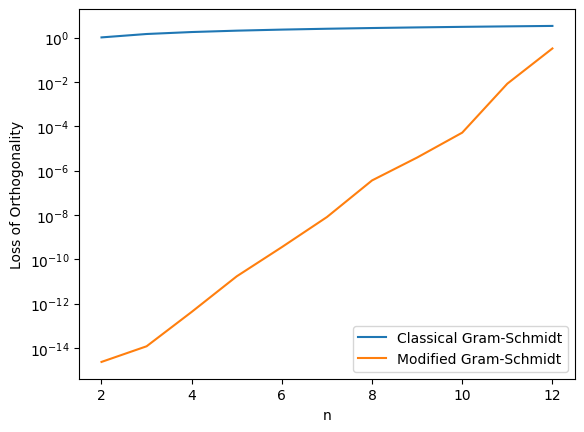

In [82]:
def loss_of_orthogonality(A):
    """
    Calculate the loss of orthogonality for a given matrix A.

    Parameters:
    - A (numpy.ndarray): The matrix for which to calculate the loss of orthogonality.

    Returns:
    - float: The loss of orthogonality, defined as the Frobenius norm of the difference
      between the transpose of A and its product with itself, i.e., ||I - A^T @ A||_F.

    The Frobenius norm is used to measure the magnitude of the matrix.
    A smaller loss of orthogonality indicates a matrix closer to orthogonality.
    For an orthogonal matrix, the loss of orthogonality is expected to be zero.
    """

    return np.linalg.norm(np.eye(A.shape[1]) - A.T @ A)


# Set the range of n values
n_values = list(range(2, 13))

loss_classical = []
loss_modified = []
loss_qr = []

for n in n_values:
    H = np.array([[1 / (i + j - 1) for j in range(1, n + 1)] for i in range(1, n + 1)])

    Q_classical = classical_gram_schmidt(H)[0]
    loss_classical.append(loss_of_orthogonality(Q_classical))

    Q_modified = modified_gram_schmidt(H)[0]
    loss_modified.append(loss_of_orthogonality(Q_modified))

plt.plot(n_values, loss_classical, label='Classical Gram-Schmidt')
plt.plot(n_values, loss_modified, label='Modified Gram-Schmidt')
plt.yscale('log')
plt.xlabel('n')
plt.ylabel('Loss of Orthogonality')
plt.legend()
plt.show()

## (c) (1.5 pts)
Try applying the classical procedure twice. Plot again the loss of orthogonality when computing the QR decomposition of the Hilbert matrix of size $n$ as in (b).


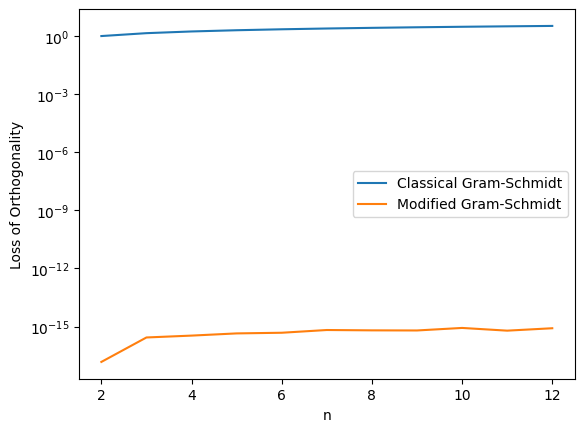

In [83]:
n_values = list(range(2, 13))

loss_classical = []
loss_modified = []

for n in n_values:
    H = np.array([[1 / (i + j - 1) for j in range(1, n + 1)] for i in range(1, n + 1)])

    Q_classical = classical_gram_schmidt(classical_gram_schmidt(H)[0])[0]
    loss_classical.append(loss_of_orthogonality(Q_classical))

    Q_modified = modified_gram_schmidt(modified_gram_schmidt(H)[0])[0]
    loss_modified.append(loss_of_orthogonality(Q_modified))

plt.plot(n_values, loss_classical, label='Classical Gram-Schmidt')
plt.plot(n_values, loss_modified, label='Modified Gram-Schmidt')
plt.yscale('log')
plt.xlabel('n')
plt.ylabel('Loss of Orthogonality')
plt.legend()

plt.show()

## (d) (2 pts)
Implement the Householder method for computing the QR decomposition. Remember to include a short documentation.

In [84]:
def householder_qr(A):
    """
    Compute the QR decomposition of a matrix A using the Householder method.

    Parameters:
    - A: The input matrix of shape (m, n).

    Returns:
    - Q: The orthogonal matrix of shape (m, m).
    - R: The upper triangular matrix of shape (m, n).

    Note:
    - The input matrix A is not modified by this function.
    """
    m, n = A.shape
    Q = np.eye(m)  #I
    R = A.copy()

    for k in range(min(m, n)):
        # Compute Householder vector
        x = R[k:, k]
        v = np.zeros_like(x)
        v[0] = np.sign(x[0]) * np.linalg.norm(x)
        v = v + x
        v = v / np.linalg.norm(v)

        # Compute Householder 
        H = np.eye(m)
        H[k:, k:] -= 2.0 * np.outer(v, v)

        # Apply Householder to R and Q
        R = np.dot(H, R)
        Q = np.dot(Q, H)

    return Q, R

In [85]:
A = np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
Q, R = householder_qr(A)
print(R)

[[-1.28562874e+01 -1.45029940e+01 -1.61497006e+01]
 [ 8.07413399e-01  1.91393957e+00  3.02046575e+00]
 [-2.52897695e-01 -1.17400271e-16  2.52897695e-01]
 [ 2.92194217e-16 -1.67689141e-16  7.73646682e-18]]


## (e) (2 pts)
Perform the analysis of (b) for the Householder method. Discuss the differences between all the methods you have tested so far. Look online and/or in books for information about the accuracy of the different methods and include this in your explanations (with reference).


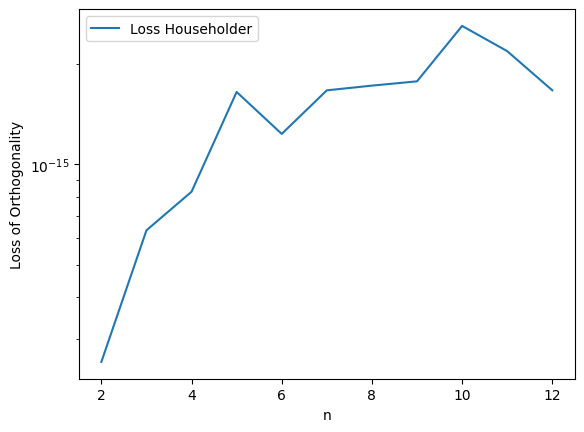

In [86]:
n_values = list(range(2, 13))

loss_householder = []

for n in n_values:
    H = np.array([[1 / (i + j - 1) for j in range(1, n + 1)] for i in range(1, n + 1)])

    Q, R = householder_qr(H)
    loss_householder.append(loss_of_orthogonality(Q))

plt.plot(n_values, loss_householder, label='Loss Householder')
plt.yscale('log')
plt.xlabel('n')
plt.ylabel('Loss of Orthogonality')
plt.legend()

plt.show()

## Main differences
The Classical Gram-Schmidt method orthogonalizes the columns of the matrix one by one. It starts with the first column and orthogonalizes the remaining columns with respect to it.
The Modified Gram-Schmidt method works similarly, but instead of orthogonalizing the remaining columns with respect to the current column, it orthogonalizes all remaining columns with respect to all previous columns. This decreases the loss of orthogonality with respect to the classical method.

The Householder QR method is a entirely different method alltogether. It performs so-called Householder reflections and applied them to transform the matrix to an upper triagular matrix. Householder reflections are orthogonal transformations that zero out all values below a certain point in a vector.  

## Differences in accuracy
The main way the accuracy between these methods could differ is the accumulation of rounding errors. Since the Classical Gram-Schmidt method orthogonalizes the columns one by one with respect to the first one, each new calculation will add to the rounding error that most likely appeared during the calculation of the first column. The Modified Gram-Schmidt method has a higher accuracy, because it calculates the new column based on the previous column, which will lessen the accumulated errors, but it will not remove it completely. Householder QR works by directly zeroing out entries below the main diagonal and does not rely on previous calculatios. Therefore, it also does not propagate previous errors. The only error is floating point.